In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Create the dataframe properly

-->pd.read_csv(),pd.read_excel()

In [2]:
# read data into pd Data frame

data = pd.read_csv(r"Advertising.csv", index_col=0, header=0)
data.head()


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
print(data.dtypes)
print(data.shape)
print(data.describe())

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
(200, 4)
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [4]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

No missing Values as such we have clean data to handle

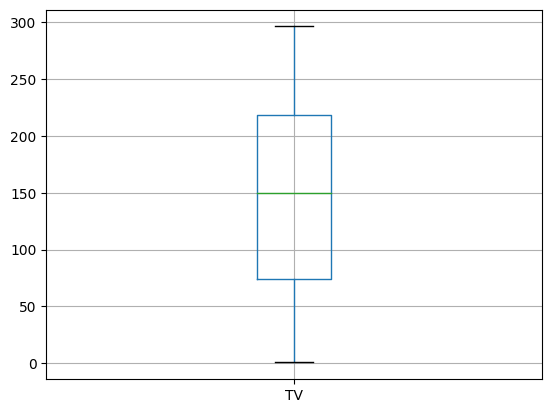

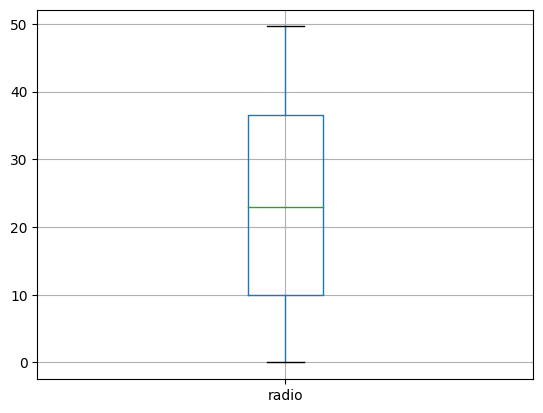

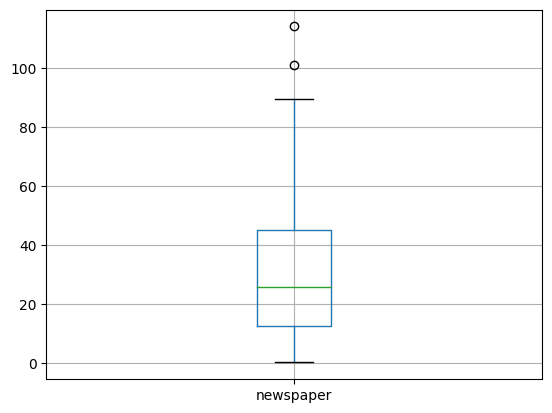

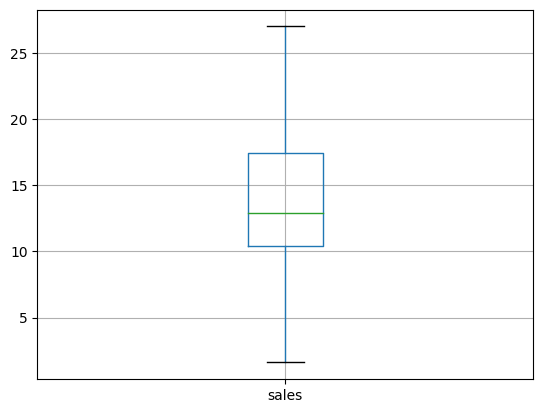

In [5]:
# Assumption 1: There should be no outliers in the data.
# CHeck using boxplot

for i in data.columns:
    data.boxplot(column=i)
    plt.show()
    
#  We have suspected that there are outliers in the newpaper variable.   
# In this case we are not eliminating them considering that they are not extreme outliers.

C:\Users\Rakesh Rao\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


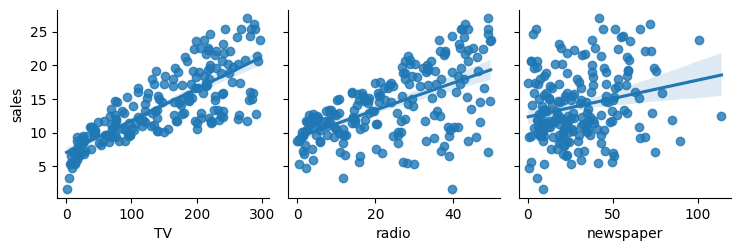

In [6]:
# Assumption 2: Assumption of linearity: Every ind var should have a linear relationship
# with the dependent variable

sns.pairplot(data, x_vars=["TV", "radio", "newspaper"], y_vars=["sales"],kind="reg")

plt.show()


# TV and Radio Shows a positive relationship with sales 
# but newspaper does not show a linear relationship so ideally we can eliminate it.

In [7]:
# data.drop(["newspaper"],axis=1,inplace=True)

# We can eliminate a variable which do not show a linear relationship

## Spliting the data

In [8]:
# Create X and Y
X = data.loc[:,["TV", "radio", "newspaper"]]
Y = data.loc[:,"sales"]
# X = data.iloc[:,0:-1]
# Y = data.iloc[:,-1]


In [9]:
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


In [10]:
import warnings
warnings.filterwarnings("ignore")

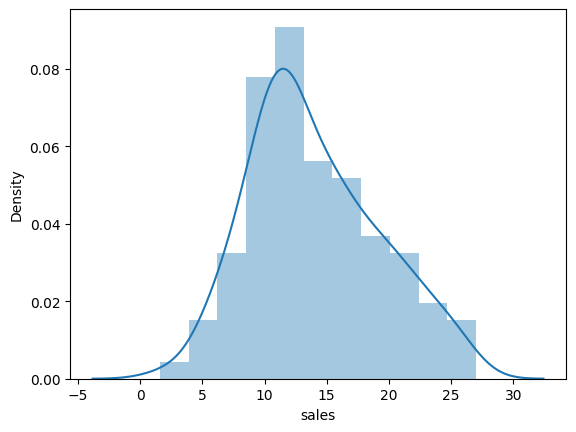

In [11]:
#Assumption 3: Assumption of Normality: The Dependent variable should follows
#  an approximate normal distribution

sns.distplot(Y)
plt.show()





In case of normally skewed data we can take basic approach by eleminating the outliers.

Log transformation should only done when the data is highly skewed.
And if the data is log transformed then use only the transformed data ahead.
Do not unnessarily log transform the data as it will increase the skewness

"""

Log transformation

import numpy as np
Y_log = np.log(Y)

"""

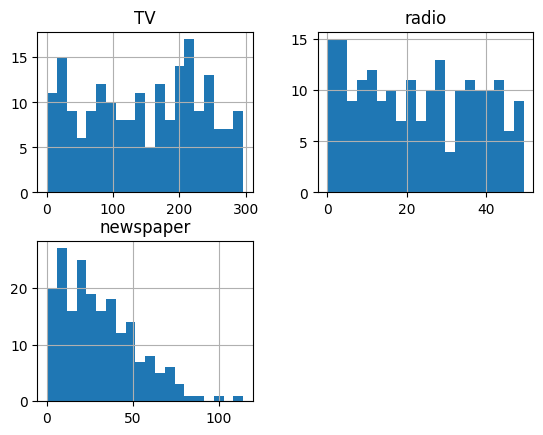

In [12]:
X.hist(bins=20)
plt.show()


# only the newspaper variable is right skewed

In [13]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = X.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
 
print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])


# If we have performed the log0 we may end up -inf value which will throw an error at a later stage.
# In this case we can use log1p which will help us add one and then take a log to avoid -inf.

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


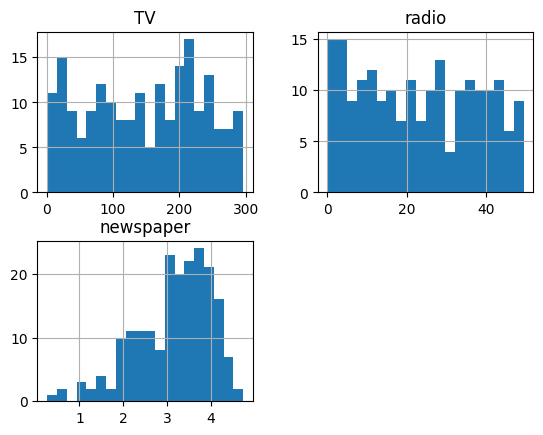

In [14]:
X.hist(bins=20)
plt.show()


                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


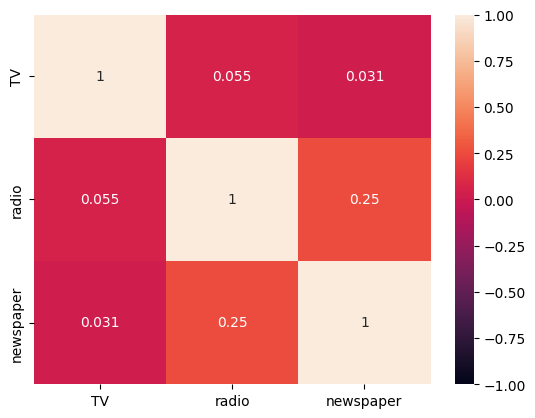

In [15]:
#Assumption of no multicollinearity: There should be no multicollinearity 
#between the independent variables
#multicollinearity is the relationship amongst the multiple independent variables
corr_df=X.corr(method="pearson")
print(corr_df)
 
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

In [16]:
# Incase of Multi-co-linearity in the data.

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


In [17]:
#X.drop("Newspaper", axis=1, inplace =True)
# rerun the VIF code

# eleminate only one variable at a time which shows the highest VIF value.
# As the problematic gets eleminates the other variables will start having lower vif values.

In [18]:
from sklearn.model_selection import train_test_split

# Split the data into test and train

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

In [19]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

print("Percent of train data", X_train.shape[0]/X.shape[0]*100)

(160, 3)
(160,)
(40, 3)
(40,)
Percent of train data 80.0


In [20]:
#>1000 --> test_size = 0.3
#<1000 --> test_size = 0.2

In [21]:
from sklearn.linear_model import LinearRegression
#Create a model object
lm = LinearRegression()
# Train the model bject
lm.fit(X_train,Y_train)


# printing the intercept and coefficient
print(lm.intercept_)  ## beta 0
print(lm.coef_)       ## beta 1

3.353291385815158
[ 0.0437425   0.19303708 -0.04895137]


In [22]:
# pair the coefficient with the features name

print(list(zip(X.columns, lm.coef_)))

[('TV', 0.04374250157742163), ('radio', 0.19303707897345293), ('newspaper', -0.04895136822248809)]


In [23]:
X1=100
X2=100
X3=np.log1p(100)
Y_pred=3.3532913858151474+(0.0437425*X1)+(0.19303708*X2)+(-0.04895137*X3)
print(Y_pred)

26.805332913800658


In [24]:
# predict using the model
Y_pred = lm.predict(X_test)

print(Y_pred)

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


In [25]:
new_df=pd.DataFrame()
new_df=X_test.copy()
 
new_df["Actual sales"]=Y_test
new_df["Predicted sales"]=Y_pred
new_df=new_df.reset_index().drop("index", axis=1)

In [26]:
new_df

,TV,radio,newspaper,Actual sales,Predicted sales
0,210.7,29.5,2.332144,18.4,18.150269
1,8.7,48.9,4.330733,7.2,12.961369
2,218.4,27.7,3.996364,18.0,18.058153
3,283.6,42.0,4.207673,25.5,23.660251
4,216.4,41.7,3.703768,22.6,20.687510
5,147.3,23.9,3.000720,14.6,14.263259
6,188.4,18.1,3.280911,14.9,14.927745
7,198.9,49.4,4.110874,23.7,21.388474
8,216.8,43.9,3.339322,22.3,21.147529
9,17.2,45.9,4.252772,9.3,12.757885


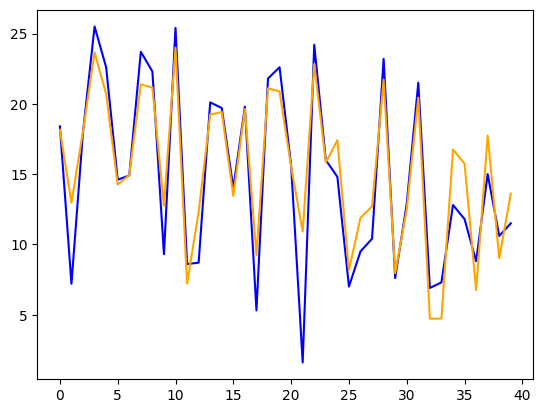

In [27]:
new_df["Actual sales"].plot(color = "blue")
new_df["Predicted sales"].plot(color="orange")
plt.show()

# R2 Score

In [28]:
lm.score(X_train,Y_train)
# Y_pred = lm.predict(X_train)
# score =r2_sccore()

0.920898664750022

In [29]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8348010719035319
RMSE: 2.592976911093061
Adj R-square: 0.8322725168816472


In [30]:
print(Y_test.min())
print(Y_test.max())

1.6
25.5


The R-square value is close to 1 , the adjusted R-square is close to R-square and the RMSE is at the lowest range of Y_test, SO it is a good model.

In [31]:
new_df["Residual"] = new_df["Actual sales"]-new_df["Predicted sales"]
new_df.to_excel("Sales Prediction.xlsx",header=True, index=True)
new_df.head()

,TV,radio,newspaper,Actual sales,Predicted sales,Residual
0,210.7,29.5,2.332144,18.4,18.150269,0.249731
1,8.7,48.9,4.330733,7.2,12.961369,-5.761369
2,218.4,27.7,3.996364,18.0,18.058153,-0.058153
3,283.6,42.0,4.207673,25.5,23.660251,1.839749
4,216.4,41.7,3.703768,22.6,20.687510,1.912490


# Ridge

In [32]:
from sklearn.linear_model import Ridge
rid = Ridge()
rid.fit(X_train,Y_train)


print(rid.intercept_)
print(rid.coef_)

3.3522471725965985
[ 0.04374234  0.19302603 -0.04853131]


In [33]:
Y_pred = rid.predict(X_test)

In [34]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)



"""
R-squared: 0.8348010719035319
RMSE: 2.592976911093061
Adj R-square: 0.8322725168816472
"""

R-squared: 0.8348082644975935
RMSE: 2.5929204626839977
Adj R-square: 0.8322798195664342


'\nR-squared: 0.8348010719035319\nRMSE: 2.592976911093061\nAdj R-square: 0.8322725168816472\n'

# LASSO

In [35]:
from sklearn.linear_model import Lasso

las = Lasso()
las.fit(X_train,Y_train)


print(las.intercept_)
print(las.coef_)

3.336794058220317
[ 0.04362374  0.18766033 -0.        ]


In [36]:
Y_pred = las.predict(X_test)

In [37]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)



"""
MODEL VALUES

R-squared: 0.8348010719035319
RMSE: 2.592976911093061
Adj R-square: 0.8322725168816472


RIDGE VALUES:

R-squared: 0.8348082644975935
RMSE: 2.5929204626839977
Adj R-square: 0.8322798195664342

"""

R-squared: 0.8360506658527163
RMSE: 2.5831514271094234
Adj R-square: 0.8335412372688292


'\nMODEL VALUES\n\nR-squared: 0.8348010719035319\nRMSE: 2.592976911093061\nAdj R-square: 0.8322725168816472\n\n\nRIDGE VALUES:\n\nR-squared: 0.8348082644975935\nRMSE: 2.5929204626839977\nAdj R-square: 0.8322798195664342\n\n'

# OLS Ordinary least Square (Statsmodel)

In [38]:
# OLS --> OLS(Y_train, X_train)
#ols  --> ols(Y~X1+X2+X3)

In [39]:
#fit(X_train, Y_train) --> sklearn
#Y~X1+X2+X3, data = df --> statsmodel

In [41]:
new_df = pd.DataFrame()
new_df = X_train.copy()


new_df["sales"] = Y_train.copy()
new_df.shape

(160, 4)

In [47]:
import statsmodels.formula.api as sm

#creare a fitted model with all three features
lm_model = sm.ols(formula="sales~ TV + radio + newspaper", data=new_df).fit()

#printing the coefficients
print(lm_model.params)
print(lm_model.summary())

"""
3.3522471725965985
[ 0.04374234  0.19302603 -0.04853131]

"""

Intercept    3.353291
TV           0.043743
radio        0.193037
newspaper   -0.048951
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           1.10e-85
Time:                        12:51:29   Log-Likelihood:                -276.63
No. Observations:                 160   AIC:                             561.3
Df Residuals:                     156   BIC:                             573.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

'\n3.3522471725965985\n[ 0.04374234  0.19302603 -0.04853131]\n\n'


Assumtion 5: There should be no auto-correlation in the data

Auto-correlation means relationship between same variable that is Y releated with Y
It is found in Time Series Data

Y-current related with Y-Previous
eg. Stock price today depends on stock price yesterday.



Durbin-watson:
    
    Durbin-watson Ranges : 0 to 4
    
    If the Durbin-watson value is close to 2 --> no auto correlation
    If the Durbin-watson value is close to 0 --> +ve auto correlation
    If the Durbin-watson value is close to 4 --> -ve auto correlation

In [48]:
Y_pred_new = lm_model.predict(X_test)

In [50]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred_new)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)



"""
MODEL VALUES

R-squared: 0.8348010719035319
RMSE: 2.592976911093061
Adj R-square: 0.8322725168816472


RIDGE VALUES:

R-squared: 0.8348082644975935
RMSE: 2.5929204626839977
Adj R-square: 0.8322798195664342

LASSO:

R-squared: 0.8360506658527163
RMSE: 2.5831514271094234
Adj R-square: 0.8335412372688292

"""

R-squared: 0.8348010719035376
RMSE: 2.5929769110930163
Adj R-square: 0.8322725168816529


'\nMODEL VALUES\n\nR-squared: 0.8348010719035319\nRMSE: 2.592976911093061\nAdj R-square: 0.8322725168816472\n\n\nRIDGE VALUES:\n\nR-squared: 0.8348082644975935\nRMSE: 2.5929204626839977\nAdj R-square: 0.8322798195664342\n\nLASSO:\n\nR-squared: 0.8360506658527163\nRMSE: 2.5831514271094234\nAdj R-square: 0.8335412372688292\n\n'

In [51]:
import statsmodels.formula.api as sm

#creare a fitted model with all three features
lm_model = sm.ols(formula="sales~ TV + radio", data=new_df).fit()

#printing the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept    3.217026
TV           0.043721
radio        0.192425
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     912.9
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           3.47e-87
Time:                        13:24:02   Log-Likelihood:                -276.70
No. Observations:                 160   AIC:                             559.4
Df Residuals:                     157   BIC:                             568.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [60]:
Y_pred_new = lm_model.predict(X_test)


from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 

print("With Eliminating the NewsPaper")
r2=r2_score(Y_test,Y_pred_new)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


print("""
MODEL VALUES

R-squared: 0.8348010719035319
RMSE: 2.592976911093061
Adj R-square: 0.8322725168816472


RIDGE VALUES:

R-squared: 0.8348082644975935
RMSE: 2.5929204626839977
Adj R-square: 0.8322798195664342

LASSO:

R-squared: 0.8360506658527163
RMSE: 2.5831514271094234
Adj R-square: 0.8335412372688292


Without Eliminating the NewsPaper:

R-squared: 0.8348010719035376
RMSE: 2.5929769110930163
Adj R-square: 0.8322725168816529
""")

With Eliminating the NewsPaper
R-squared: 0.8354496662944217
RMSE: 2.58788170773781
Adj R-square: 0.8329310387377037

MODEL VALUES

R-squared: 0.8348010719035319
RMSE: 2.592976911093061
Adj R-square: 0.8322725168816472


RIDGE VALUES:

R-squared: 0.8348082644975935
RMSE: 2.5929204626839977
Adj R-square: 0.8322798195664342

LASSO:

R-squared: 0.8360506658527163
RMSE: 2.5831514271094234
Adj R-square: 0.8335412372688292


Without Eliminating the NewsPaper:

R-squared: 0.8348010719035376
RMSE: 2.5929769110930163
Adj R-square: 0.8322725168816529



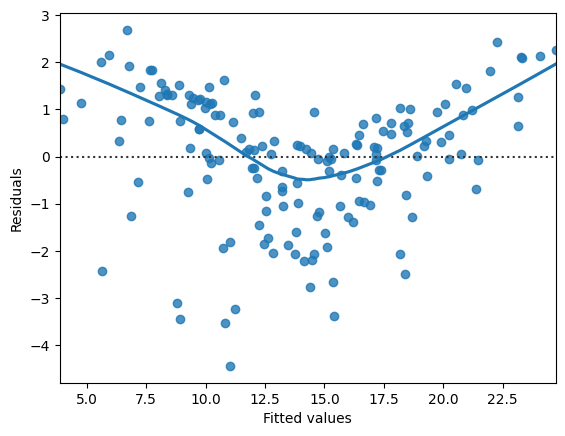

In [62]:
#Assumption: Errors should be random
#checked using Residual v/s Fitted plot
model_fitted_y = lm_model.fittedvalues
sns.residplot(x=model_fitted_y, y='sales', data=new_df, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()



# The line should be a random line and should not follow a wave like pattern

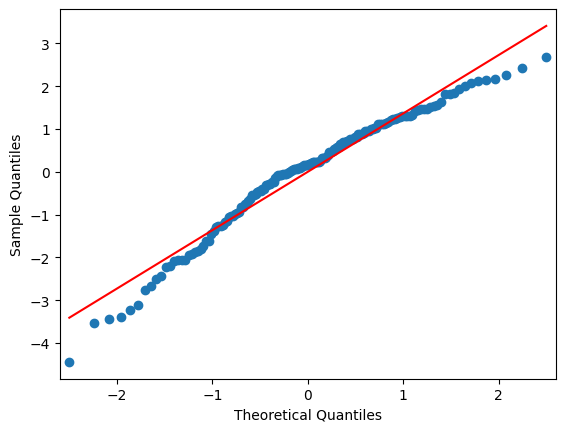

In [66]:
#Assumption: Errors should follow a approximate normal distribution
#checked using Normal QQ plot (Quantile-Quantile plot)
import statsmodels.api as sma
sma.qqplot(lm_model.resid, line='s')



## The Error points should follow the red diagonal line
#  The normal QQ plot is use to compare a given set of values with standard normal distributed data (Theoretical Quantiles)

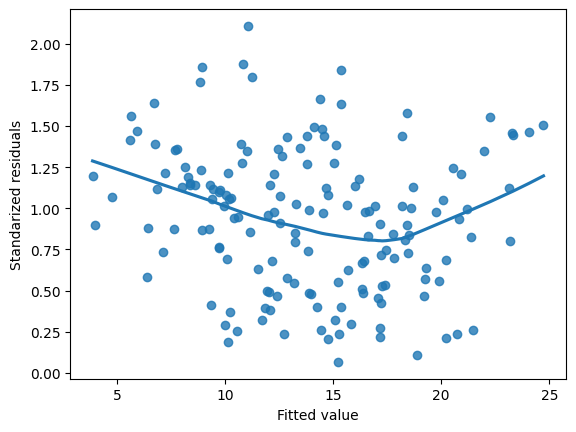

In [71]:
#Assumption: Errors should follow a constant variance-->Homoskedasticity
#checked using Scale location plot
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(lm_model.resid))
 
sns.regplot(x=lm_model.fittedvalues,
            y=model_norm_residuals_abs_sqrt,
              scatter=True, lowess=True)        
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.show()




## V-shape = Heteroskedasticity
## Approx tilted line = Homoskedasticity

## Assumption states that it should follow a Homoskedasticity, not the Hetroskedasticity.
## The Line should be an approximate horizontal line and should not have a steep angle or a V-shape line.
